<a href="https://colab.research.google.com/github/agmCorp/colab/blob/main/deskew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Subí una imagen (png/jpg)…


Saving IMG_8927.jpeg to IMG_8927.jpeg
Ángulo detectado: -90.00°


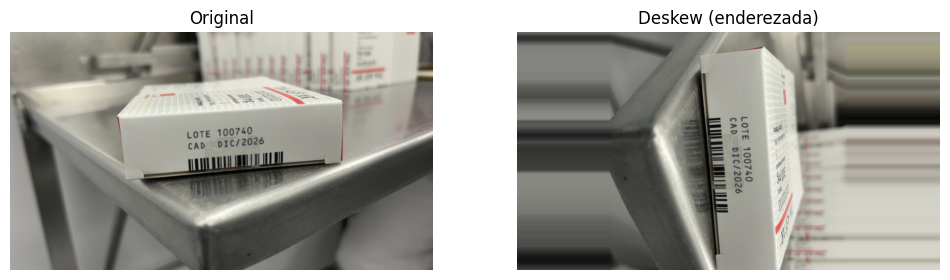

In [2]:
# ==========================
# 1) Instalación e imports
# ==========================
!pip -q install opencv-python numpy matplotlib >/dev/null

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# ==========================
# 2) Subir imagen
# ==========================
print("Subí una imagen (png/jpg)…")
up = files.upload()
assert len(up) > 0, "No se subió imagen."
name, content = next(iter(up.items()))
data = np.frombuffer(content, dtype=np.uint8)
img = cv2.imdecode(data, cv2.IMREAD_COLOR)
assert img is not None, "No se pudo leer la imagen."

# ==========================
# 3) Función deskew
# ==========================
def deskew_image(image_bgr):
    gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)

    # Umbral para destacar texto / bordes
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    # Coordenadas de píxeles no vacíos
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]

    # Ajuste del rango del ángulo
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    # Rotación
    (h, w) = image_bgr.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image_bgr, M, (w, h),
                             flags=cv2.INTER_CUBIC,
                             borderMode=cv2.BORDER_REPLICATE)

    print(f"Ángulo detectado: {angle:.2f}°")
    return rotated

# ==========================
# 4) Procesar y mostrar
# ==========================
rotated = deskew_image(img)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title("Deskew (enderezada)")
plt.axis("off")
plt.show()
